In [9]:
import pandas as pd

In [10]:
wq_red = pd.read_csv('data/winequality-red.csv')
raisin = pd.read_excel('data/Raisin_Dataset.xlsx')
diabetes = pd.read_csv('data/diabetes.csv')
wq_red = wq_red.sample(n=600, random_state=1)
raisin = raisin.sample(n=600, random_state=1)
diabetes = diabetes.sample(n=600, random_state=1)

In [11]:
X_red_wine = wq_red.drop('quality', axis=1).to_numpy()
y_red_wine = wq_red['quality'].to_numpy()
X_raisin = raisin.drop('Class', axis=1).to_numpy()
y_raisin = raisin['Class'].to_numpy()
X_diabetes = diabetes.drop('Outcome', axis=1).to_numpy()
y_diabetes = diabetes['Outcome'].to_numpy()

In [17]:
X_values = [X_red_wine, X_raisin, X_diabetes]
titles = ["Red Wine quality", "Raisin Varieties", "Diabetes Outcome"]

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import Functions as f

In [14]:
iterations = 100
error = 0.0001
alpha = 0.001

In [15]:
dr_results = f.generate_dr_results(X_values, iterations, error, alpha)

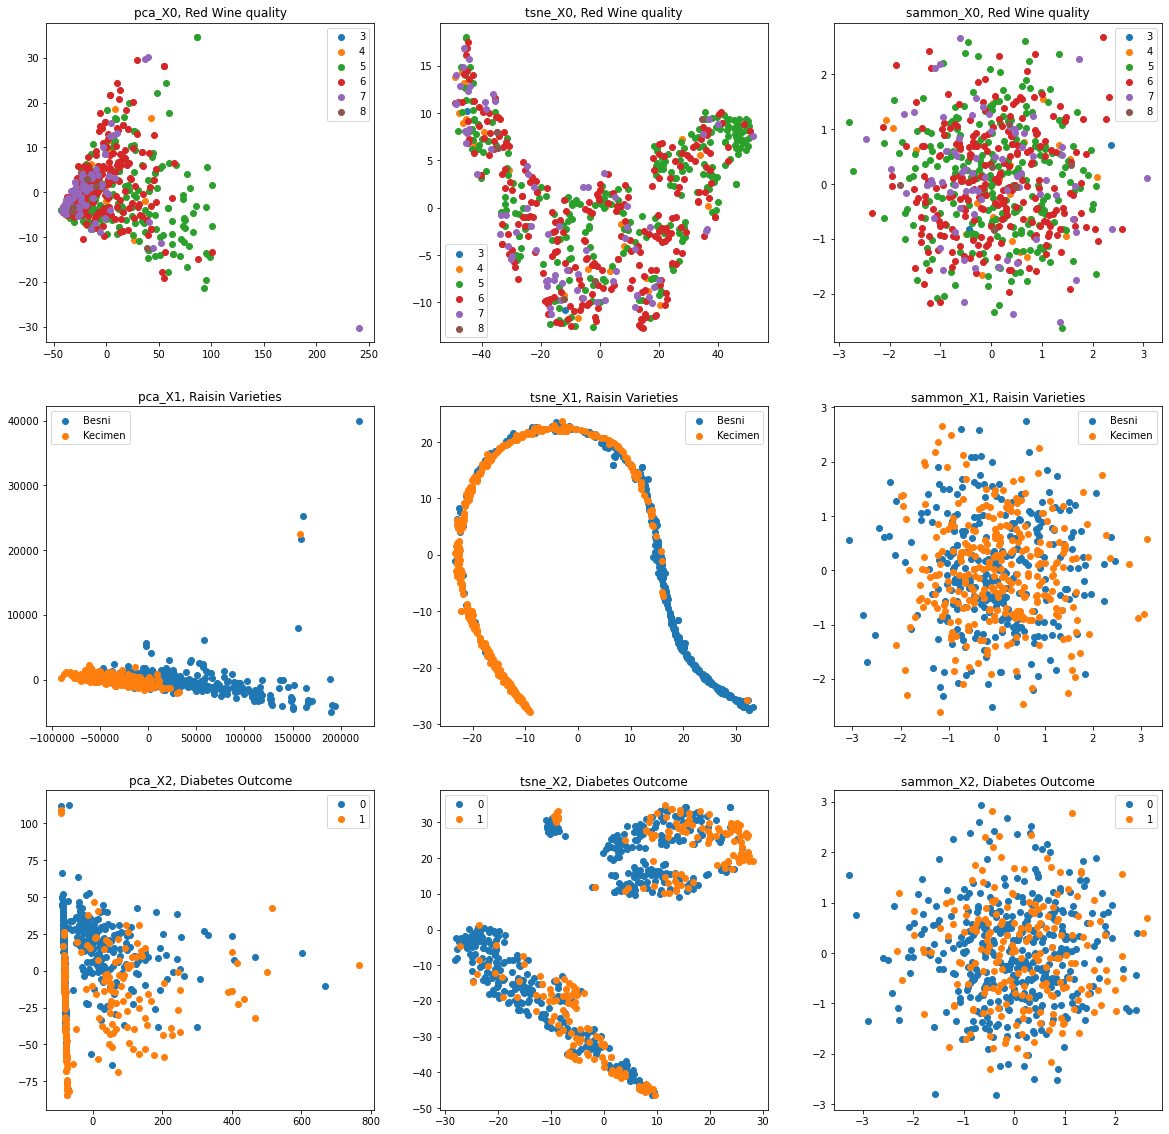

In [27]:
cmap = cm.get_cmap('Set2')
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i in range(9):
    result = list(dr_results.values())[i]
    y = np.empty(result.shape[0])
    title = ""
    if i < 3 :
        y = y_red_wine
        title = titles[0]
    elif i < 6:
        y = y_raisin
        title = titles[1]
    else:
        y = y_diabetes
        title = titles[2]
    unique_labels = np.unique(y)
    for label in unique_labels:
        x = result[y == label, 0]
        y_data = result[y == label, 1]
        scatter = axes[i // 3, i % 3].scatter(x, y_data, label=str(label), cmap=cmap)

    axes[i // 3, i % 3].set_title(list(dr_results.keys())[i] + ", " + title)
    axes[i // 3, i % 3].legend()

3.2 Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap.

In [33]:
indices = [1, 4, 7]
selected_dr = [list(dr_results.values()) [i] for i in indices]

In [36]:
# import kmeans from sklearn
from sklearn.cluster import KMeans
# import hierarchical clustering from scipy
from scipy.cluster.hierarchy import dendrogram, linkage
clustering_results = {}
for i, dr in enumerate(selected_dr):
    bkmeans = f.bkmeans(dr, 5, 20)
    kmeans = KMeans(n_clusters=5, random_state=0).fit(dr)
    linkage_matrix = linkage(dr, method='complete', metric='euclidean')
    clustering_results[f'bkmeans_X{i}'] = bkmeans
    clustering_results[f'kmeans_X{i}'] = kmeans
    clustering_results[f'hierarchical_clustering_X{i}'] = linkage_matrix

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, key in enumerate(clustering_results.keys()):
    clustering_result = clustering_results[key]
    if key.startswith('hierarchical'):
        dendrogram(clustering_result, ax=axes[i// 3, i % 3])
        axes[i// 3, i % 3].set_title(key)
    else:
        axes[i//3, i % 3].scatter(selected_dr[:, 0], selected_dr[:, 1], c=clustering_result.labels_, cmap=cmap)
        axes[i//3, i % 3].set_title(key)